In [1]:
 using PowerSystemCaseBuilder
 using SiennaPRASInterface
 using PowerSystems
 using Plots
 using CSV, DataFrames


In [2]:
sys = build_system(PowerSystemCaseBuilder.SPISystems, "RTS_GMLC_5min with Static Outage Data")

┌ Info: Loaded time series from storage file existing=/projects/emco4286/.julia/packages/PowerSystemCaseBuilder/oMfVC/data/serialized_system/e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b934ca495991b7852b855/RTS_GMLC_5min with Static Outage Data_time_series_storage.h5 new=/projects/emco4286/code-server/tmp/jl_WCJuTV compression=CompressionSettings(false, CompressionTypes.DEFLATE = 1, 3, true)
└ @ InfrastructureSystems /projects/emco4286/.julia/packages/InfrastructureSystems/LEg3t/src/hdf5_time_series_storage.jl:110


Property,Value
Name,
Description,
System Units Base,DEVICE_BASE
Base Power,100.0
Base Frequency,60.0
Num Components,546
Type,Count
ACBus,73
Arc,109
Area,3


In [3]:


rts_outage_ts_data = CSV.read(
        joinpath("/projects", "emco4286", "data", "sienna_data", "RTS_Test_Outage_Time_Series_Data.csv"),
        DataFrame,
    )

Row,Unit,Year Installed,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEPT,OCT,NOV,DEC
,String15,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,101_CT_1,1974,0.385675,0.576425,0.5559,0.49665,0.53655,0.45545,0.38305,0.3105,0.307125,0.245225,0.29935,0.2837
2,101_CT_2,1975,0.274525,0.320075,0.367,0.44565,0.39525,0.3826,0.4584,0.482475,0.402875,0.3666,0.3406,0.295175
3,101_STEAM_3,1999,0.04435,0.077975,0.08335,0.027625,0.0359,0.025525,0.06085,0.060525,0.056675,0.01785,0.05915,0.047975
4,101_STEAM_4,1999,0.096175,0.074625,0.1812,0.0852,0.05065,0.010775,0.1025,0.044675,0.2135,0.01895,0.1873,0.125925
5,102_CT_1,1992,0.04105,0.017025,0.0205,0.12335,0.04765,0.069,0.156225,0.0316,0.0475,0.028375,0.05835,0.076275
6,102_CT_2,1994,0.0125,0.0413,0.047575,0.045625,0.124025,0.148075,0.148825,0.0316,0.013025,0.014375,0.0397,0.0375
7,102_STEAM_3,1993,0.0,0.033775,0.026775,0.01975,0.0079,0.046375,0.061025,0.06165,0.206925,0.051775,0.053075,0.0523
8,102_STEAM_4,1998,0.33225,0.437125,0.4007,0.4292,0.38355,0.342225,0.3672,0.36225,0.375075,0.3803,0.3202,0.23445
9,107_CC_1,1993,0.25425,0.036875,0.107725,0.205425,0.190225,0.3416,0.312175,0.223175,0.024175,0.033475,0.290525,0.2555


In [4]:
add_timeseries_outage_data!(sys, rts_outage_ts_data)

UndefVarError: UndefVarError: `add_timeseries_outage_data!` not defined

In [40]:
component = get_component(ThermalStandard, sys,  "101_CT_1")

ThermalStandard: 101_CT_1:
   name: 101_CT_1
   available: true
   status: true
   bus: ACBus: Abel
   active_power: 0.3333333333333333
   reactive_power: 0.20666666666666667
   rating: 0.9316949906249125
   active_power_limits: (min = 0.3333333333333333, max = 0.8333333333333334)
   reactive_power_limits: (min = 0.0, max = 0.4166666666666667)
   ramp_limits: (up = 0.125, down = 0.125)
   operation_cost: ThermalGenerationCost composed of variable: FuelCurve{PiecewiseIncrementalCurve}
   base_power: 24.0
   time_limits: (up = 1.0, down = 1.0)
   must_run: false
   prime_mover_type: PrimeMovers.CT = 8
   fuel: ThermalFuels.DISTILLATE_FUEL_OIL = 3
   services: 5-element Vector{Service}
   time_at_status: 10000.0
   dynamic_injector: nothing
   ext: Dict{String, Any}()
   InfrastructureSystems.SystemUnitsSettings:
      base_value: 100.0
      unit_system: UnitSystem.DEVICE_BASE = 1
   has_supplemental_attributes: true
   has_time_series: false

In [41]:
for supplemental_attribute in iterate_supplemental_attributes(sys)
    @show supplemental_attribute
end

supplemental_attribute = GeometricDistributionForcedOutage(0.0, 0.0)
supplemental_attribute = GeometricDistributionForcedOutage(31.0, 0.0010319917440660476)
supplemental_attribute = GeometricDistributionForcedOutage(40.0, 0.0010416666666666667)
supplemental_attribute = GeometricDistributionForcedOutage(20.0, 0.000505050505050505)
supplemental_attribute = GeometricDistributionForcedOutage(31.0, 0.0010319917440660476)
supplemental_attribute = GeometricDistributionForcedOutage(0.0, 0.0)
supplemental_attribute = GeometricDistributionForcedOutage(20.0, 0.000505050505050505)
supplemental_attribute = GeometricDistributionForcedOutage(31.0, 0.0010319917440660476)
supplemental_attribute = GeometricDistributionForcedOutage(40.0, 0.0010416666666666667)
supplemental_attribute = GeometricDistributionForcedOutage(0.0, 0.0)
supplemental_attribute = GeometricDistributionForcedOutage(40.0, 0.0005102040816326531)
supplemental_attribute = GeometricDistributionForcedOutage(0.0, 0.0)
supplemental_attribute

In [ ]:
component = get_component(RenewableDispatch, sys,  "122_WIND_1")

RenewableDispatch: 122_WIND_1:
   name: 122_WIND_1
   available: true
   bus: ACBus: Aubrey
   active_power: 0.0
   reactive_power: 0.0
   rating: 1.0
   prime_mover_type: PrimeMovers.WT = 22
   reactive_power_limits: (min = 0.0, max = 0.0)
   power_factor: 1.0
   operation_cost: RenewableGenerationCost composed of variable: CostCurve{LinearCurve}, curtailment_cost: CostCurve{LinearCurve}
   base_power: 713.5
   services: 5-element Vector{Service}
   dynamic_injector: nothing
   ext: Dict{String, Any}()
   InfrastructureSystems.SystemUnitsSettings:
      base_value: 100.0
      unit_system: UnitSystem.DEVICE_BASE = 1
   has_supplemental_attributes: true
   has_time_series: true

In [37]:
ts_keys = get_time_series_keys(component)

2-element Vector{TimeSeriesKey}:
 ForecastKey(DeterministicSingleTimeSeries, "max_active_power", Dates.DateTime("2020-01-01T00:00:00"), Dates.Millisecond(3600000), Dates.Hour(48), Dates.Hour(24), 365, Dict{String, Any}())
 StaticTimeSeriesKey(SingleTimeSeries, "max_active_power", Dates.DateTime("2020-01-01T00:00:00"), Dates.Millisecond(3600000), 8784, Dict{String, Any}())

In [38]:
data = get_time_series(component, ts_keys[2]).data

8784×1 TimeSeries.TimeArray{Float64, 1, Dates.DateTime, Vector{Float64}} 2020-01-01T00:00:00 to 2020-12-31T23:00:00
┌─────────────────────┬────────────┐
│                     │ A          │
├─────────────────────┼────────────┤
│ 2020-01-01T00:00:00 │    0.99958 │
│ 2020-01-01T01:00:00 │   0.999019 │
│ 2020-01-01T02:00:00 │   0.992852 │
│ 2020-01-01T03:00:00 │   0.996076 │
│ 2020-01-01T04:00:00 │   0.983041 │
│ 2020-01-01T05:00:00 │   0.956552 │
│ 2020-01-01T06:00:00 │   0.861528 │
│ 2020-01-01T07:00:00 │   0.725578 │
│          ⋮          │     ⋮      │
│ 2020-12-31T17:00:00 │  0.0147162 │
│ 2020-12-31T18:00:00 │  0.0721794 │
│ 2020-12-31T19:00:00 │   0.112684 │
│ 2020-12-31T20:00:00 │   0.102313 │
│ 2020-12-31T21:00:00 │   0.121093 │
│ 2020-12-31T22:00:00 │   0.148143 │
│ 2020-12-31T23:00:00 │    0.18192 │
└─────────────────────┴────────────┘
                   8769 rows omitted

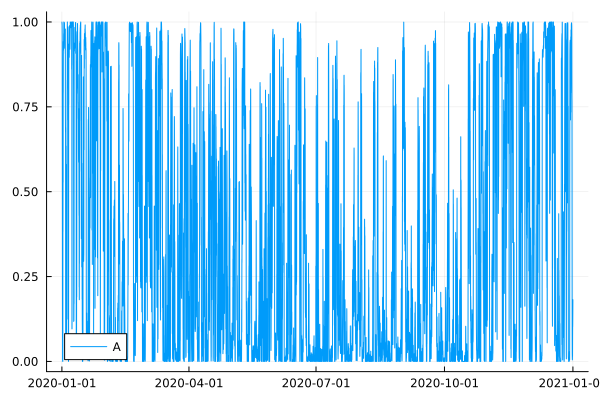

In [39]:
plot(data)